In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

salary = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
salary.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


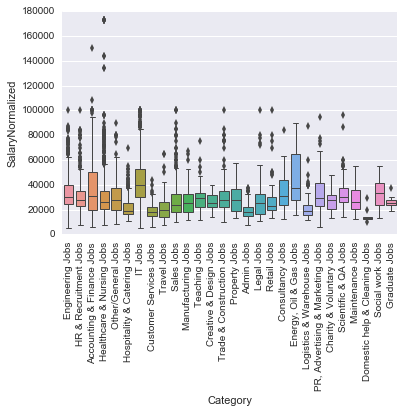

In [4]:
import seaborn as sns
sns.set()
s=sns.boxplot(x="Category", y="SalaryNormalized",data=salary, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                    10000 non-null int64
Title                 9999 non-null object
FullDescription       10000 non-null object
LocationRaw           10000 non-null object
LocationNormalized    10000 non-null object
ContractType          3556 non-null object
ContractTime          4737 non-null object
Company               5951 non-null object
Category              10000 non-null object
SalaryRaw             10000 non-null object
SalaryNormalized      10000 non-null int64
SourceName            10000 non-null object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


(array([  8.,  12.,   9.,  66., 300., 446., 520., 592., 489., 376., 649.,
        838., 451., 656., 598., 286., 366., 462., 182., 296., 353., 121.,
        245., 282.,  51., 136., 195.,  32.,  93., 138.,  26.,  46., 120.,
          7.,  48.,  59.,  21.,  21.,  47.,  22.,  15.,  54.,  11.,  22.,
         32.,  12.,  56.,  44.,   7.,   5.,  22.,   0.,   3.,   6.,  10.,
          4.,  20.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          6.]),
 array([  5184.  ,   6860.16,   8536.32,  10212.48,  11888.64,  13564.8 ,
         15240.96,  16917.12,  18593.28,  20269.44,  21945.6 ,  23621.76,
         25297.92,  26974.08,  28650.24,  30326.4 ,  32002.56,  33678.72,
         35354.88,  37031.04,  38707.2 ,  40383.36,  42059.52,  43735.68,
         45411.84,  47

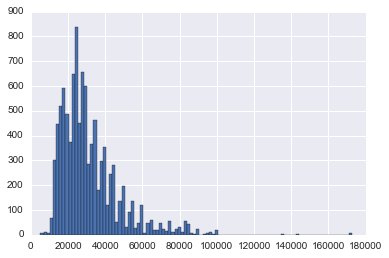

In [6]:
plt.hist(salary.SalaryNormalized, bins=100)

In [72]:
salary.dtypes

Id                       int64
Title                 category
FullDescription         object
LocationRaw             object
LocationNormalized    category
ContractType          category
ContractTime          category
Company               category
Category              category
SalaryRaw               object
SalaryNormalized         int64
SourceName            category
titleID                  int64
LocationID               int64
ConTypeID                int64
ConTimeID                int64
CompanyID                int64
CatID                    int64
SourceID                 int64
engineer                  bool
manager                   bool
analyst                   bool
dtype: object

In [28]:
salary["titleID"]=pd.factorize(salary.Title)[0]
salary["LocationID"]=pd.factorize(salary.LocationNormalized)[0]
salary["ConTypeID"]=pd.factorize(salary.ContractType)[0]
salary["ConTimeID"]=pd.factorize(salary.ContractTime)[0]
salary["CompanyID"]=pd.factorize(salary.Company)[0]
salary["CatID"]=pd.factorize(salary.Category)[0]
salary["SourceID"]=pd.factorize(salary.SourceName)[0]
salary["engineerID"]=pd.factorize(salary.engineer)[0]

In [60]:
salary["engineer"]=salary.FullDescription.str.contains('[Ee]ngineer')[0]
salary["manager"]=salary.FullDescription.str.contains('[Mm]anager')[0]
salary["analyst"]=salary.FullDescription.str.contains('[Aa]nalyst')[0]

In [74]:
salary["engineerID"]=pd.factorize(salary.engineer)[0]

In [76]:
salary.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,...,LocationID,ConTypeID,ConTimeID,CompanyID,CatID,SourceID,engineer,manager,analyst,engineerID
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,...,0,-1,0,0,0,0,True,False,True,0
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,...,1,-1,0,0,0,0,True,False,True,0
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,...,2,-1,0,0,0,0,True,False,True,0
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,...,3,-1,0,0,0,0,True,False,True,0
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,...,3,-1,0,0,0,0,True,False,True,0


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
        salary[["titleID", "LocationID", "ConTypeID", "ConTimeID", "CompanyID", "CatID",
            "SourceID","engineerID","analyst","manager"]], salary["SalaryNormalized"])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
        salary[["CatID"]], salary["SalaryNormalized"])

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [-157.1010504]
lr.intercept_: 32394.8091476
Training set score: 0.00
Test set score: 0.01


In [90]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge.coef_: [-157.1009796]
ridge.intercept_: 32394.8087593
Training set score: 0.00
Test set score: 0.01


In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.coef_: [-157.06725492]
lasso.intercept_: 32394.6237952
Training set score: 0.00
Test set score: 0.01
Number of features used: 1


In [81]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=70)
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.09


In [73]:
def number_encode_features(salary):
    result = salary.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
encoded_data, _ = number_encode_features(salary)
encoded_data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,...,titleID,LocationID,ConTypeID,ConTimeID,CompanyID,CatID,SourceID,engineer,manager,analyst
0,12612628,Engineering Systems Analyst,2698,685,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,1361,...,0,0,-1,0,0,0,0,True,False,True
1,12612830,Stress Engineer Glasgow,8322,885,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,2022,...,1,1,-1,0,0,0,0,True,False,True
2,12612844,Modelling and simulation analyst,4661,959,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,1378,...,2,2,-1,0,0,0,0,True,False,True
3,12613049,Engineering Systems Analyst / Mathematical Mod...,2697,2038,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1998,...,3,3,-1,0,0,0,0,True,False,True
4,12613647,"Pioneer, Miser Engineering Systems Analyst",6228,2038,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1361,...,4,3,-1,0,0,0,0,True,False,True


In [8]:
encoded_data["SalaryNormalized"].mean()

31522.6156

In [9]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                    10000 non-null int64
Title                 10000 non-null int64
FullDescription       10000 non-null int64
LocationRaw           10000 non-null int64
LocationNormalized    10000 non-null int64
ContractType          10000 non-null int64
ContractTime          10000 non-null int64
Company               10000 non-null int64
Category              10000 non-null int64
SalaryRaw             10000 non-null int64
SalaryNormalized      10000 non-null int64
SourceName            10000 non-null int64
dtypes: int64(12)
memory usage: 937.6 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
        encoded_data[["Title", "LocationNormalized", "ContractType", "ContractTime", "Company", "Category",
            "SourceName"]], encoded_data["SalaryNormalized"])

In [7]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7500, 7)

(2500, 7)

(7500L,)

(2500L,)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 1.34226628e-02  9.46384374e-01 -4.41659502e-01  1.21826734e+00
 -1.38826694e+00 -1.54201561e+02  1.60529705e+02]
lr.intercept_: 30864.3583101
Training set score: 0.11
Test set score: 0.11


In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.11
Test set score: 0.11


In [10]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.11
Test set score: 0.11
Number of features used: 7


In [27]:
lasso.coef_,lasso.intercept_

(array([ 1.34211395e-02,  9.46343182e-01, -4.41664993e-01,  1.21827975e+00,
        -1.38827608e+00, -1.54173503e+02,  1.60526768e+02]),
 30864.134148675235)

In [29]:
ridge.coef_, ridge.intercept_

(array([ 1.34226351e-02,  9.46383828e-01, -4.41659621e-01,  1.21826762e+00,
        -1.38826714e+00, -1.54200984e+02,  1.60529642e+02]), 30864.35358663429)